In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# nos 🔥: **N**itrous **O**xide **S**ystem for Computer Vision

**NOS** is a PyTorch library for optimizing and running lightning-fast inference of popular computer vision models. NOS inherits its name from "Nitrous Oxide System", the performance-enhancing system typically used in racing cars. NOS is designed to be modular and easy to extend.

## Why NOS?
- ⚡️ **Fast**: Built for PyTorch and designed to optimize/run models faster
- 🔥 **Performant**: Run models such as SDv2 or object detection 2-3x faster out-of-the-box
- 👩‍💻 **No PhD required**: Optimize models for maximum HW performance without a PhD in ML
- 📦 **Extensible**: Easily add optimization and HW-support for custom models
- ⚙️ **HW-accelerated:** Take full advantage of your HW (GPUs, ASICs) without compromise
- ☁️ **Cloud-agnostic:** Run on any cloud HW (AWS, GCP, Azure, Lambda Labs, On-Prem)

## Batteries Included
 - 💪 **SOTA Model Support:** NOS provides out-of-the-box support for popular CV models such as [Stable Diffusion](stabilityai/stable-diffusion-2), [OpenAI CLIP](openai/clip-vit-base-patch32), [OpenMMLab](https://github.com/open-mmlab/) object detection, tracking and more
 - 🔌 **APIs:** NOS provides out-of-the-box APIs and avoids all the ML model deployment hassles
 - 🐳 **Docker:** NOS ships with docker images to run accelerated and scalable CV workloads
 - 📈 **Multi-Platform**: NOS allows you to run models on different HW (NVIDIA, custom ASICs) without any model compilation or runtime management.

## 0. Installation

```bash
pip install autonomi-nos[torch]
```

Alternatively, if you have `torch` already installed, you can simply run:
```bash
pip install autonomi-nos
```

### 1. Quickstart

NOS uses a client-server architecture to run inference. The NOS server is a gRPC server that runs on your local machine or in the cloud. The NOS client is a Python SDK that allows you to send inference requests to the NOS server. Let's get started by running the NOS server locally.

```bash
nos docker start --runtime [cpu/gpu/trt]
```

This will start the NOS server in a docker container. You can now run inference requests using the NOS client. You have the option to run 3 different server runtimes:
 - `cpu`: Runs the NOS server on CPU (all models run on CPU with PyTorch)
 - `gpu`: Runs the NOS server on GPU (all models run on GPU with PyTorch)
 - `trt`: Runs the NOS server on GPU (all models run on GPU with PyTorch + [TensorRT](https://developer.nvidia.com/tensorrt))

### 1a. Quickstart (via `docker compose` or `docker run`)

You can also get started with NOS using our docker server via:
```bash
docker run -it \
    -p 50051:50051 \
    -v ~/.nosd:/app/.nos \
    --shm-size 4g \
    autonomi/nos:latest-cpu
```

Alternatively, you can also start the nos docker server as a service within a docker compose YAML. Navigate to the `examples/quickstart` folder and run the NOS server via:

```bash
docker compose -f docker-compose.quickstart.yml up
```

Let's inspect the docker-compose file to understand what's going on:
```yaml
version: "3.8"

services:
  nos-server:
    image: autonomi/nos:latest-cpu
    command: nos-grpc-server
    ports:
      - 50051:50051
    environment:
      - NOS_HOME=/app/.nos
      - NOS_LOGGING_LEVEL=ERROR
    volumes:
      - ~/.nosd:/app/.nos
    deploy:
      resources:
        limits:
          cpus: "6"
          memory: 6G
```

We first spin up a `nos-server` service mounting the necessary host directories (`~/.nosd`) and exposing the gRPC port. The command `nos-grpc-server` spins up the gRPC server with the default 50051 port that can be used to send inference requests. The `NOS_HOME` directory is set to `/app/.nos` where all the models and optimization artifacts are stored. This directory is mounted on your host machine at `~/.nosd`. 

## Inference Client SDK


Once the NOS server is running, you can send inference requests using the NOS client SDK. To double-check if your nos server has started successfully, you can run `docker ps | grep autonomi/nos` to check the status of your server.

Let's start by importing the NOS client SDK and creating a client instance. The client instance is used to send inference requests to the NOS server.

In [25]:
import torch_tensorrt
torch_tensorrt.__version__

'1.4.0'

In [34]:
from nos.client import InferenceClient, TaskType

# Create a client that connects to the inference server via gRPC (50051)
client = InferenceClient()

In [35]:
# We provide helper functions to wait for the server to be ready
# if the server is simultaneously spun up in a separate process.
client.WaitForServer()

True

In [36]:
# Finally, we can check if the server is healthy.
client.IsHealthy()

True

### List all available models

Now that we have a client instance, let's list all the available models that are supported by NOS. You can use the `ListModels()` method to list all the available models. Here, we render the list of models as a Pandas dataframe for easy viewing. 

In [21]:
import pandas as pd
pd.set_option('display.max_colwidth', 0)

models = client.ListModels()
models_df = pd.DataFrame(models)
models_df

,name,task,signature
0,openai/clip,TaskType.TEXT_EMBEDDING,None
1,openai/clip,TaskType.IMAGE_EMBEDDING,None
2,openai/clip-vit-base-patch32,TaskType.TEXT_EMBEDDING,None
3,openai/clip-vit-base-patch32,TaskType.IMAGE_EMBEDDING,None
4,openai/clip-vit-large-patch14,TaskType.TEXT_EMBEDDING,None
5,openai/clip-vit-large-patch14,TaskType.IMAGE_EMBEDDING,None
6,laion/CLIP-ViT-H-14-laion2B-s32B-b79K,TaskType.TEXT_EMBEDDING,None
7,laion/CLIP-ViT-H-14-laion2B-s32B-b79K,TaskType.IMAGE_EMBEDDING,None
8,laion/CLIP-ViT-L-14-laion2B-s32B-b82K,TaskType.TEXT_EMBEDDING,None
9,laion/CLIP-ViT-L-14-laion2B-s32B-b82K,TaskType.IMAGE_EMBEDDING,None


### Get model input/output signatures

In order to run inference, we need to know the input and output signatures of the model. We can use the `GetModelInfo()` method to get the full model specification (`task`, `model_name`, `signature` with `inputs` and `outputs`). 

In [37]:
signatures = [client.GetModelInfo(spec).signature for spec in models]
pd.DataFrame(signatures, index=[(m.name, m.task) for m in models])[["inputs", "outputs"]]

,inputs,outputs
"(openai/clip, TaskType.TEXT_EMBEDDING)","{'texts': typing.Annotated[nos.common.types.Batch, <class 'str'>, None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(512,), dtype='float32')], None]}"
"(openai/clip, TaskType.IMAGE_EMBEDDING)","{'images': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.ImageT, <class 'PIL.Image.Image'>, ImageSpec(shape=None, dtype=None)], None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(512,), dtype='float32')], None]}"
"(openai/clip-vit-base-patch32, TaskType.TEXT_EMBEDDING)","{'texts': typing.Annotated[nos.common.types.Batch, <class 'str'>, None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(512,), dtype='float32')], None]}"
"(openai/clip-vit-base-patch32, TaskType.IMAGE_EMBEDDING)","{'images': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.ImageT, <class 'PIL.Image.Image'>, ImageSpec(shape=None, dtype=None)], None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(512,), dtype='float32')], None]}"
"(openai/clip-vit-large-patch14, TaskType.TEXT_EMBEDDING)","{'texts': typing.Annotated[nos.common.types.Batch, <class 'str'>, None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(768,), dtype='float32')], None]}"
"(openai/clip-vit-large-patch14, TaskType.IMAGE_EMBEDDING)","{'images': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.ImageT, <class 'PIL.Image.Image'>, ImageSpec(shape=None, dtype=None)], None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(768,), dtype='float32')], None]}"
"(laion/CLIP-ViT-H-14-laion2B-s32B-b79K, TaskType.TEXT_EMBEDDING)","{'texts': typing.Annotated[nos.common.types.Batch, <class 'str'>, None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(1024,), dtype='float32')], None]}"
"(laion/CLIP-ViT-H-14-laion2B-s32B-b79K, TaskType.IMAGE_EMBEDDING)","{'images': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.ImageT, <class 'PIL.Image.Image'>, ImageSpec(shape=None, dtype=None)], None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(1024,), dtype='float32')], None]}"
"(laion/CLIP-ViT-L-14-laion2B-s32B-b82K, TaskType.TEXT_EMBEDDING)","{'texts': typing.Annotated[nos.common.types.Batch, <class 'str'>, None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(768,), dtype='float32')], None]}"
"(laion/CLIP-ViT-L-14-laion2B-s32B-b82K, TaskType.IMAGE_EMBEDDING)","{'images': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.ImageT, <class 'PIL.Image.Image'>, ImageSpec(shape=None, dtype=None)], None]}","{'embedding': typing.Annotated[nos.common.types.Batch, typing.Annotated[nos.common.types.TensorT, <class 'numpy.ndarray'>, EmbeddingSpec(shape=(768,), dtype='float32')], None]}"


## 2. Run Inference

Now, we're ready to run inference using our client. First, let's load an image for inference. 

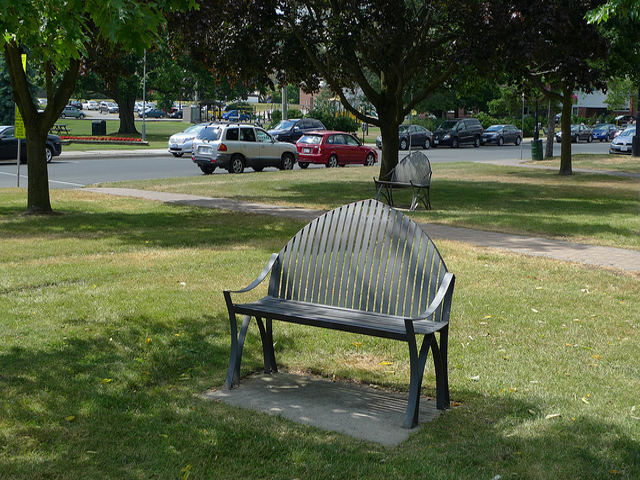

In [38]:
import requests
from PIL import Image


url = "https://raw.githubusercontent.com/open-mmlab/mmdetection/main/demo/demo.jpg"
img = Image.open(requests.get(url, stream=True).raw).resize((640, 480))
img

### 2a. Inference: Object Detection with YOLOX (in < 5 lines)

Here, we will use the `client.Run` API to run inference on the YOLOX object detection model. See the [`client.Run(...)`](https://autonomi-ai.github.io/nos/docs/api/client/#nos.client.grpc.InferenceClient.Run) documentation for more details.

In our list of available models above we see yolox/{small, medium, large} and yolox/{small-trt, medium-trt, large-trt}. The former are 'vanilla' yolox models running purely in Pytorch, while the latter are optimized using the TensorRT library yielding a significant speedup. Let's test out one of each (yolox/nano and yolox/nano-trt) and compare the inference speed.

*Note:* In the first call of the `client.Run(...)` API, the model is loaded from the model repository and, for the TensorRT models, optimized for the first time. This may take a few seconds. Subsequent calls to `client.Run(...)` will be much faster.

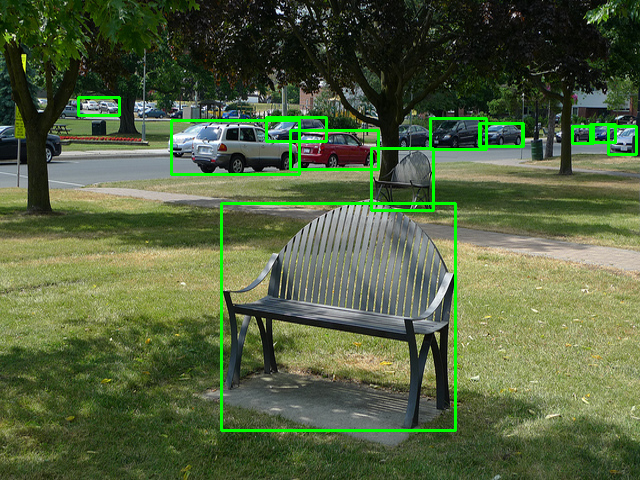

In [39]:
import cv2
import numpy as np

def visualize_det2d(img: np.ndarray, bboxes: np.ndarray, labels: np.ndarray) -> np.ndarray:
    """Visualize 2D detection results on an image."""
    vis = np.asarray(img).copy()
    for bbox, label in zip(bboxes.astype(np.int32), labels):
        cv2.rectangle(vis, (bbox[0], bbox[1]), (bbox[2], bbox[3]), (0, 255, 0), 2)
    return vis

# Run YOLOX prediction on the image and get the prediction results as a dictionary.
# predictions = {"bboxes", "scores", "labels"}.
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/nano", images=[img])
for idx, (img, bboxes, scores, labels) in enumerate(zip([img], predictions["bboxes"], predictions["scores"], predictions["scores"])):
    display(Image.fromarray(visualize_det2d(img, bboxes, labels)))


In [40]:
# Let's do the same for yolox/nano-trt (The TensorRT version of the above model). Note that this one will take a bit longer on the first pass since we need to compile it first.
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/nano-trt", images=[img])
for idx, (img, bboxes, scores, labels) in enumerate(zip([img], predictions["bboxes"], predictions["scores"], predictions["scores"])):
    display(Image.fromarray(visualize_det2d(img, bboxes, labels)))

NosClientException: Failed to run model yolox/nano-trt (<_InactiveRpcError of RPC that terminated with:
	status = StatusCode.INTERNAL
	details = "Internal Server Error"
	debug_error_string = "UNKNOWN:Error received from peer ipv6:%5B::%5D:50051 {created_time:"2023-06-30T16:53:33.580059854-07:00", grpc_status:13, grpc_message:"Internal Server Error"}"
>)

### 2b. Benchmark Object Detection

Now that we've run inference on a single image, let's run inference on a batch of images and benchmark the performance. We will run `client.Run` repeatedly on an image (`batch_size = 1`) and measure the average latency. You can also modify the code above to increase the batch size and measure the latency for larger batch sizes.

In [9]:
%%timeit -n 100
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/medium", images=[img])

23.5 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [25]:
%%timeit -n 100
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/medium-trt", images=[img])

25.4 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


The TensorRT model should be slightly faster.

## 3. `client.Module` Interface

Instead of calling `client.Run` specifying task and model names repeatedly, we can also use the `client.Module` interface to get model handles for simpler remote-model execution. In this case, the following line re-uses the same `yolox/nano` model instantiated earlier as creates a handle called `det2d` that can be used by the client to get object detection results.  

In [ ]:
detect2d = client.Module(TaskType.OBJECT_DETECTION_2D, "yolox/nano")

Here's an example of an object detection. We're going to generate bounding box overlays from both yolox/nano and yolox/nano-trt and render them side by side.

In [ ]:
predictions = detect2d(images=[img])
predictions

In [10]:
from pathlib import Path
from itertools import islice
from nos.common import tqdm
from nos.common.io import VideoReader, VideoWriter
import os
import numpy as np

# Download a test video for inference
filename = "test_video.mp4"
URL = "https://zackakil.github.io/video-intelligence-api-visualiser/assets/test_video.mp4"
if not Path(filename).exists():
    with open(filename, "wb") as f:
        f.write(requests.get(URL).content)

def generate_detections_video(output_filename, model_name):
    detect2d = client.Module(TaskType.OBJECT_DETECTION_2D, model_name)

    # Run inference on every 500th frame, and display the results
    if os.path.exists(output_filename):
        os.remove(output_filename)
    writer = VideoWriter(output_filename, fps=30)
    for idx, img in enumerate(tqdm(islice(VideoReader(filename), 0, None, 1))):
        H, W = img.shape[:2]
        img = cv2.resize(img, (640, 480))
        
        if model_name is "yolox/medium_trt":
            predictions = detect2d(images=[np.array(img).astype(np.float16)])
        else:
            predictions = detect2d(images=[np.array(img).astype(np.float32)])

        if idx > 1000:
            break
        # for idx, (img, bboxes, scores, labels) in enumerate(zip([img], predictions["bboxes"], predictions["scores"], predictions["scores"])):
            # vis = visualize_det2d(img, bboxes, labels)
            # vis = cv2.resize(vis, (W, H))
            # writer.write(vis)
    # writer.close()
    

generate_detections_video("test_video_out.mp4", "yolox/medium")
generate_detections_video("test_video_out_trt.mp4", "yolox/medium-trt")

<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
<>:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
/tmp/ipykernel_932145/1849899503.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_name is "yolox/medium_trt":
23it [00:04,  5.11it/s]
/tmp/ipykernel_932145/1849899503.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_name is "yolox/medium_trt":
/tmp/ipykernel_932145/1849899503.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_name is "yolox/medium_trt":
/tmp/ipykernel_932145/1849899503.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_name is "yolox/medium_trt":
/tmp/ipykernel_932145/1849899503.py:26: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if model_name is "yolox/medium_trt":


KeyboardInterrupt: 

Note the it/s are noticable higher for the second detection pass (about %40 faster with TensorRT). Let's visualize the results of the inference below. The detections should be more or less identical.

In [20]:
from ipywidgets import Output, GridspecLayout
from IPython import display

filepaths = ["test_video_out.mp4", "test_video_out_trt.mp4"]

grid = GridspecLayout(1, len(filepaths))

for i, filepath in enumerate(filepaths):
    out = Output()
    with out:
        display.display(display.Video(filepath, embed=True))
    grid[0, i] = out

grid

GridspecLayout(children=(Output(layout=Layout(grid_area='widget001')), Output(layout=Layout(grid_area='widget0…

CLIP embedding for video frames

In [43]:
# Download a test video for inference
filename = "test_video.mp4"
URL = "https://zackakil.github.io/video-intelligence-api-visualiser/assets/test_video.mp4"
if not Path(filename).exists():
    with open(filename, "wb") as f:
        f.write(requests.get(URL).content)

embedding = client.Module(TaskType.IMAGE_EMBEDDING, "openai/clip-trt")
for idx, img in enumerate(tqdm(islice(VideoReader(filename), 0, None, 1))):
    H, W = img.shape[:2]
    img = cv2.resize(img, (224, 224))    
    predictions = embedding(images=[img])
    if idx > 1000:
        break

1001it [00:28, 35.68it/s]


In [33]:
embedding = client.Module(TaskType.IMAGE_EMBEDDING, "openai/clip")
for idx, img in enumerate(tqdm(islice(VideoReader(filename), 0, None, 1))):
    H, W = img.shape[:2]
    img = cv2.resize(img, (224, 224))    
    predictions = embedding(images=[np.array(img).astype(np.float32)])
    if idx > 1000:
        break

1001it [00:54, 18.23it/s]


## 4. NOS Model Hub

Let's try a few more models that come pre-packaged with NOS. You can find the full list of models in the [NOS Model Hub]().

 ### 4a. Text-to-image generation with [StableDiffusionV2](https://huggingface.co/stabilityai/stable-diffusion-2)

In [ ]:
prompts = ["fox jumped over the moon", "fox jumped over the sun"]
predictions = client.Run(TaskType.IMAGE_GENERATION, "stabilityai/stable-diffusion-2", 
                         prompts=prompts, width=512, height=512, num_images=1)

In [ ]:
for prompt, image in zip(prompts, predictions["images"]):
    print(prompt, image.size)
    display(image)

### 4b. Run image-embedding with [OpenAI CLIP](https://huggingface.co/openai/clip-vit-base-patch32)

In [ ]:
predictions = client.Run(TaskType.IMAGE_EMBEDDING, "openai/clip", images=[img, img])
predictions["embedding"].shape

### 4c. Run text-embedding with [OpenAI CLIP](https://huggingface.co/openai/clip-vit-base-patch32)

In [ ]:
predictions = client.Run(TaskType.TEXT_EMBEDDING, "openai/clip", texts=["fox jumped over the mooon", "fox jumped over the sun"])
predictions["embedding"].shape

Now that you have familiarized yourself with the NOS client SDK, let's dig a bit deeper into how NOS can accelerate your existing computer-vision workloads. Navigate to the [inference-acceleration-example notebook](./inference-acceleration-example.ipynb).

### 5. Runnning Optimized Models

NOS also comes baked with a number of pre-optimized models that you can use out-of-the-box. Let's try running inference on the pre-optimized CLIP model:

In [ ]:
# Load the model, and run inference once to warm up the model
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/small", images=[img])

In [ ]:
%%timeit -n 10
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/small", images=[img])

In [ ]:
# Load the optimized model, and run inference once to warm up the model
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/small-trt", images=[img])

In [ ]:
%%timeit -n 10
predictions = client.Run(TaskType.OBJECT_DETECTION_2D, "yolox/small-trt", images=[img])